In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xgboost as xg
import operator
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

c:\users\123\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
a=pd.read_csv(r'C:\Users\123\Desktop\caixun\data\lab_data.csv')
t=pd.read_csv(r'C:\Users\123\Desktop\caixun\data\lab_data_y.csv')
b=[a,t]

In [3]:
a.head()

,cur_arrears_1M,cur_arrears_2M,cur_arrears_3M,arpu_1M,arpu_2M,arpu_3M,reduce_fee_1M,reduce_fee_2M,reduce_fee_3M,prdct_fee_1M,...,login_times_3M,read_times_1M,read_times_2M,read_times_3M,click_times_1M,click_times_2M,click_times_3M,mpost_actcnt_1M,mpost_actcnt_2M,mpost_actcnt_3M
0,0.00,0.00,0.0,406.60,327.00,314.23,0.00,0.00,0.0,402.0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.23,0.0,28.15,15.23,72.24,37.89,12.45,0.0,0.0,...,11,0,0,0,8,10,12,0,0,0
2,51.76,0.00,0.0,24.39,26.38,31.71,30.20,29.60,30.2,12.0,...,0,0,1,0,0,1,0,0,0,0
3,0.00,0.00,0.0,0.00,0.00,20.36,0.00,0.00,0.0,0.0,...,1,0,0,2,0,0,2,0,0,0
4,0.00,0.00,0.0,0.00,0.00,28.33,0.00,0.00,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
a.describe()

,cur_arrears_1M,cur_arrears_2M,cur_arrears_3M,arpu_1M,arpu_2M,arpu_3M,reduce_fee_1M,reduce_fee_2M,reduce_fee_3M,prdct_fee_1M,...,login_times_3M,read_times_1M,read_times_2M,read_times_3M,click_times_1M,click_times_2M,click_times_3M,mpost_actcnt_1M,mpost_actcnt_2M,mpost_actcnt_3M
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,24.274814,25.384536,10.799240,101.885498,98.046336,104.646999,23.945409,24.791724,25.932107,68.839148,...,7.213536,12.867645,11.827138,13.526754,15.186198,14.746791,18.597433,0.005334,0.004167,0.003501
std,153.472158,155.234210,77.298907,567.270582,540.304292,571.713905,72.107415,71.377615,92.852835,131.034344,...,42.995718,180.637023,156.330248,118.027217,113.837358,123.874197,194.700259,0.079417,0.064426,0.067002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,28.185000,28.440000,30.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,67.760000,66.000000,69.740000,0.000000,0.000000,0.000000,50.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.115000,0.000000,125.650000,119.090000,125.750000,10.000000,10.000000,10.000000,92.000000,...,4.000000,3.000000,2.000000,3.000000,7.000000,6.000000,9.000000,0.000000,0.000000,0.000000
max,4903.230000,4612.000000,2784.820000,34291.660000,33260.910000,35488.460000,1675.210000,1357.980000,3668.600000,7037.000000,...,2219.000000,10519.000000,9723.000000,4664.000000,6783.000000,7613.000000,13482.000000,2.000000,1.000000,2.000000


In [5]:
t.describe()

,is_actpay
count,5999.000000
mean,0.500083
std,0.500042
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
def compare(x):
    if x>0:x=1
    return int(x)


b=a[["cur_arrears_1M","cur_arrears_2M",'cur_arrears_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['cur_arrears']
a=pd.concat([a,b],axis=1)
a=a.drop(["cur_arrears_1M","cur_arrears_2M",'cur_arrears_3M'],axis=1)

b=a[["arpu_1M","arpu_2M",'arpu_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['arpu']
a=pd.concat([a,b],axis=1)
a=a.drop(["arpu_1M","arpu_2M",'arpu_3M'],axis=1)

b=a[["reduce_fee_1M","reduce_fee_2M",'reduce_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['reduce_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["reduce_fee_1M","reduce_fee_2M",'reduce_fee_3M'],axis=1)
     
b=a[["prdct_fee_1M","prdct_fee_2M",'prdct_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['prdct_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["prdct_fee_1M","prdct_fee_2M",'prdct_fee_3M'],axis=1)
     
a=a.drop(["outpkg_voice_fee_1M","outpkg_voice_fee_2M",'outpkg_voice_fee_3M'],axis=1)
a=a.drop(["outpkg_mem_fee_1M","outpkg_mem_fee_2M",'outpkg_mem_fee_3M'],axis=1)
a=a.drop(["prov_top1"],axis=1)
a=a.drop(['agent_fee_1M','agent_fee_2M','agent_fee_3M'],axis=1)
     
b=a[["outpkg_network_fee_1M","outpkg_network_fee_2M",'outpkg_network_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['outpkg_network_fee']
a=a=pd.concat([a,b],axis=1)
a=a.drop(["outpkg_network_fee_1M","outpkg_network_fee_2M",'outpkg_network_fee_3M','roma_total_fee_1M',
        'roma_total_fee_2M','roma_total_fee_3M','toll_call_fee_1M','toll_call_fee_2M','toll_call_fee_3M'
],axis=1)
     
b=a[["add_value_fee_1M","add_value_fee_2M",'add_value_fee_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['add_value_fee']
a=pd.concat([a,b],axis=1)
a=a.drop(["add_value_fee_1M","add_value_fee_2M",'add_value_fee_3M'],axis=1)

b=a[["login_times_1M","login_times_2M",'login_times_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['login_times']
a=pd.concat([a,b],axis=1)
a=a.drop(["login_times_1M","login_times_2M",'login_times_3M'],axis=1)

b=a[["read_times_1M","read_times_2M",'read_times_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['read_times']
a=pd.concat([a,b],axis=1)
a=a.drop(["read_times_1M","read_times_2M",'read_times_3M'],axis=1)

b=a[["click_times_1M","click_times_2M",'click_times_3M']]
b=b.apply(lambda x:sum(x)/3,axis=1)
b=pd.DataFrame(b)
b.columns=['click_times']
a=pd.concat([a,b],axis=1)
a=a.drop(["click_times_1M","click_times_2M",'click_times_3M'],axis=1)

a=a.drop(["mpost_actcnt_1M","mpost_actcnt_2M",'mpost_actcnt_3M','prdct_name'],axis=1)

#b=a['arpu']
#b=b.apply(lambda x:200 if x>200 else x)
#b=pd.DataFrame(b)
#b.columns=['arpu']
#a=a.drop(["arpu"],axis=1)
#a=pd.concat([b,a],axis=1)

ordertype_top1_mapping = {0: 1, 2: 2, 3: 3, 99: 4}
a['ordertype_top1'] = a['ordertype_top1'].map(ordertype_top1_mapping)


In [7]:
a.describe()

,ordertype_top1,cur_arrears,arpu,reduce_fee,prdct_fee,outpkg_network_fee,add_value_fee,login_times,read_times,click_times
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,2.771129,20.152863,101.526278,24.889747,82.975654,11.262964,28.997175,6.695949,12.740512,16.176807
std,0.489087,106.094200,558.279910,73.031555,345.659807,28.385142,697.646040,40.776076,133.732299,141.497670
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,31.991667,0.000000,19.666667,0.000000,0.000000,0.333333,0.333333,0.333333
50%,3.000000,0.000000,69.316667,0.000000,53.000000,0.000000,3.000000,1.000000,0.666667,2.333333
75%,3.000000,8.873333,122.350000,13.000000,93.000000,12.065000,9.333333,4.000000,3.333333,9.333333
max,4.000000,3159.680000,34347.010000,1988.903333,16522.666667,908.506667,48569.933333,2281.000000,6778.000000,9292.666667


In [8]:
a.describe()

,ordertype_top1,cur_arrears,arpu,reduce_fee,prdct_fee,outpkg_network_fee,add_value_fee,login_times,read_times,click_times
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,2.771129,20.152863,101.526278,24.889747,82.975654,11.262964,28.997175,6.695949,12.740512,16.176807
std,0.489087,106.094200,558.279910,73.031555,345.659807,28.385142,697.646040,40.776076,133.732299,141.497670
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,31.991667,0.000000,19.666667,0.000000,0.000000,0.333333,0.333333,0.333333
50%,3.000000,0.000000,69.316667,0.000000,53.000000,0.000000,3.000000,1.000000,0.666667,2.333333
75%,3.000000,8.873333,122.350000,13.000000,93.000000,12.065000,9.333333,4.000000,3.333333,9.333333
max,4.000000,3159.680000,34347.010000,1988.903333,16522.666667,908.506667,48569.933333,2281.000000,6778.000000,9292.666667


In [ ]:
for dataset in [a]:    
    dataset.loc[ dataset['arpu'] <= 20, 'arpu'] = 1
    dataset.loc[(dataset['arpu'] > 20) & (dataset['arpu'] <= 45), 'arpu'] = 2
    dataset.loc[(dataset['arpu'] > 45) & (dataset['arpu'] <= 70), 'arpu'] = 3
    dataset.loc[(dataset['arpu'] > 70) & (dataset['arpu'] <= 100), 'arpu'] = 4
    dataset.loc[(dataset['arpu'] > 100) & (dataset['arpu'] <= 150), 'arpu'] = 5
    dataset.loc[ dataset['arpu'] > 150, 'arpu']=6
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['cur_arrears'] <= 0, 'cur_arrears'] = 0
    dataset.loc[(dataset['cur_arrears'] > 0) & (dataset['cur_arrears'] <= 7), 'cur_arrears'] = 1
    dataset.loc[(dataset['cur_arrears'] > 7) & (dataset['cur_arrears'] <= 25), 'cur_arrears'] = 2
    dataset.loc[(dataset['cur_arrears'] > 25) & (dataset['cur_arrears'] <= 50), 'cur_arrears'] = 3
    dataset.loc[ dataset['cur_arrears'] > 50, 'cur_arrears']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['reduce_fee'] <= 0, 'reduce_fee'] = 0
    dataset.loc[(dataset['reduce_fee'] > 0) & (dataset['reduce_fee'] <= 6), 'reduce_fee'] = 1
    dataset.loc[(dataset['reduce_fee'] > 6) & (dataset['reduce_fee'] <= 13), 'reduce_fee'] = 2
    dataset.loc[(dataset['reduce_fee'] > 13) & (dataset['reduce_fee'] <= 40), 'reduce_fee'] = 3
    dataset.loc[ dataset['reduce_fee'] > 40, 'reduce_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['prdct_fee'] <= 0, 'prdct_fee'] = 0
    dataset.loc[(dataset['prdct_fee'] > 0) & (dataset['prdct_fee'] <= 26), 'prdct_fee'] = 1
    dataset.loc[(dataset['prdct_fee'] > 26) & (dataset['prdct_fee'] <= 60), 'prdct_fee'] = 2
    dataset.loc[(dataset['prdct_fee'] > 60) & (dataset['prdct_fee'] <= 100), 'prdct_fee'] = 3
    dataset.loc[ dataset['prdct_fee'] > 100, 'prdct_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['outpkg_network_fee'] <= 0, 'outpkg_network_fee'] = 0
    dataset.loc[(dataset['outpkg_network_fee'] > 0) & (dataset['outpkg_network_fee'] <= 4), 'outpkg_network_fee'] = 1
    dataset.loc[(dataset['outpkg_network_fee'] > 4) & (dataset['outpkg_network_fee'] <= 14), 'outpkg_network_fee'] = 2
    dataset.loc[(dataset['outpkg_network_fee'] > 14) & (dataset['outpkg_network_fee'] <= 30), 'outpkg_network_fee'] = 3
    dataset.loc[ dataset['outpkg_network_fee'] > 30, 'outpkg_network_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['add_value_fee'] <= 0, 'add_value_fee'] = 0
    dataset.loc[(dataset['add_value_fee'] > 0) & (dataset['add_value_fee'] <= 5), 'add_value_fee'] = 1
    dataset.loc[(dataset['add_value_fee'] > 5) & (dataset['add_value_fee'] <= 12), 'add_value_fee'] = 2
    dataset.loc[ dataset['add_value_fee'] > 12, 'add_value_fee']=3
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['login_times'] <= 0, 'login_times'] = 0
    dataset.loc[(dataset['login_times'] > 0) & (dataset['login_times'] <= 0.5), 'login_times'] = 1
    dataset.loc[(dataset['login_times'] > 0.5) & (dataset['login_times'] <= 1.000000), 'login_times'] = 2
    dataset.loc[(dataset['login_times'] > 1.000000) & (dataset['login_times'] <= 4), 'login_times'] = 3
    dataset.loc[ dataset['login_times'] > 4, 'login_times']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['read_times'] <= 0, 'read_times'] = 0
    dataset.loc[(dataset['read_times'] > 0) & (dataset['read_times'] <= 0.333333), 'read_times'] = 1
    dataset.loc[(dataset['read_times'] > 0.333333) & (dataset['read_times'] )<= 0.7, 'read_times'] = 2
    dataset.loc[(dataset['read_times'] > 0.7) & (dataset['read_times'] <= 3), 'read_times'] = 3
    dataset.loc[ dataset['read_times'] > 3, 'read_times']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['click_times'] <= 0, 'click_times'] = 0
    dataset.loc[(dataset['click_times'] > 0) & (dataset['click_times'] <= 0.5), 'click_times'] = 1
    dataset.loc[(dataset['click_times'] > 0.5) & (dataset['click_times'] <= 3), 'click_times'] = 2
    dataset.loc[(dataset['click_times'] > 3) & (dataset['click_times'] <= 9), 'click_times'] = 3
    dataset.loc[ dataset['click_times'] > 9, 'click_times']=4
a.head()


for dataset in [a]:    
    dataset.loc[ dataset['arpu'] <= 20, 'arpu'] = 1
    dataset.loc[(dataset['arpu'] > 20) & (dataset['arpu'] <= 45), 'arpu'] = 2
    dataset.loc[(dataset['arpu'] > 45) & (dataset['arpu'] <= 70), 'arpu'] = 3
    dataset.loc[(dataset['arpu'] > 70) & (dataset['arpu'] <= 100), 'arpu'] = 4
    dataset.loc[(dataset['arpu'] > 100) & (dataset['arpu'] <= 150), 'arpu'] = 5
    dataset.loc[ dataset['arpu'] > 150, 'arpu']=6
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['cur_arrears'] <= 0, 'cur_arrears'] = 0
    dataset.loc[(dataset['cur_arrears'] > 0) & (dataset['cur_arrears'] <= 7), 'cur_arrears'] = 1
    dataset.loc[(dataset['cur_arrears'] > 7) & (dataset['cur_arrears'] <= 25), 'cur_arrears'] = 2
    dataset.loc[(dataset['cur_arrears'] > 25) & (dataset['cur_arrears'] <= 50), 'cur_arrears'] = 3
    dataset.loc[ dataset['cur_arrears'] > 50, 'cur_arrears']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['reduce_fee'] <= 0, 'reduce_fee'] = 0
    dataset.loc[(dataset['reduce_fee'] > 0) & (dataset['reduce_fee'] <= 6), 'reduce_fee'] = 1
    dataset.loc[(dataset['reduce_fee'] > 6) & (dataset['reduce_fee'] <= 13), 'reduce_fee'] = 2
    dataset.loc[(dataset['reduce_fee'] > 13) & (dataset['reduce_fee'] <= 40), 'reduce_fee'] = 3
    dataset.loc[ dataset['reduce_fee'] > 40, 'reduce_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['prdct_fee'] <= 0, 'prdct_fee'] = 0
    dataset.loc[(dataset['prdct_fee'] > 0) & (dataset['prdct_fee'] <= 26), 'prdct_fee'] = 1
    dataset.loc[(dataset['prdct_fee'] > 26) & (dataset['prdct_fee'] <= 60), 'prdct_fee'] = 2
    dataset.loc[(dataset['prdct_fee'] > 60) & (dataset['prdct_fee'] <= 100), 'prdct_fee'] = 3
    dataset.loc[ dataset['prdct_fee'] > 100, 'prdct_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['outpkg_network_fee'] <= 0, 'outpkg_network_fee'] = 0
    dataset.loc[(dataset['outpkg_network_fee'] > 0) & (dataset['outpkg_network_fee'] <= 4), 'outpkg_network_fee'] = 1
    dataset.loc[(dataset['outpkg_network_fee'] > 4) & (dataset['outpkg_network_fee'] <= 14), 'outpkg_network_fee'] = 2
    dataset.loc[(dataset['outpkg_network_fee'] > 14) & (dataset['outpkg_network_fee'] <= 30), 'outpkg_network_fee'] = 3
    dataset.loc[ dataset['outpkg_network_fee'] > 30, 'outpkg_network_fee']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['add_value_fee'] <= 0, 'add_value_fee'] = 0
    dataset.loc[(dataset['add_value_fee'] > 0) & (dataset['add_value_fee'] <= 5), 'add_value_fee'] = 1
    dataset.loc[(dataset['add_value_fee'] > 5) & (dataset['add_value_fee'] <= 12), 'add_value_fee'] = 2
    dataset.loc[ dataset['add_value_fee'] > 12, 'add_value_fee']=3
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['login_times'] <= 0, 'login_times'] = 0
    dataset.loc[(dataset['login_times'] > 0) & (dataset['login_times'] <= 0.5), 'login_times'] = 1
    dataset.loc[(dataset['login_times'] > 0.5) & (dataset['login_times'] <= 1.000000), 'login_times'] = 2
    dataset.loc[(dataset['login_times'] > 1.000000) & (dataset['login_times'] <= 4), 'login_times'] = 3
    dataset.loc[ dataset['login_times'] > 4, 'login_times']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['read_times'] <= 0, 'read_times'] = 0
    dataset.loc[(dataset['read_times'] > 0) & (dataset['read_times'] <= 0.333333), 'read_times'] = 1
    dataset.loc[(dataset['read_times'] > 0.333333) & (dataset['read_times'] )<= 0.7, 'read_times'] = 2
    dataset.loc[(dataset['read_times'] > 0.7) & (dataset['read_times'] <= 3), 'read_times'] = 3
    dataset.loc[ dataset['read_times'] > 3, 'read_times']=4
a.head()

for dataset in [a]:    
    dataset.loc[ dataset['click_times'] <= 0, 'click_times'] = 0
    dataset.loc[(dataset['click_times'] > 0) & (dataset['click_times'] <= 0.5), 'click_times'] = 1
    dataset.loc[(dataset['click_times'] > 0.5) & (dataset['click_times'] <= 3), 'click_times'] = 2
    dataset.loc[(dataset['click_times'] > 3) & (dataset['click_times'] <= 9), 'click_times'] = 3
    dataset.loc[ dataset['click_times'] > 9, 'click_times']=4
a.head()



In [9]:
t=pd.DataFrame(t)
t.to_csv(r'C:\Users\123\Desktop\caixun\data\test\data_y.csv',index=False)
feat = a.columns
a.to_csv(r'C:\Users\123\Desktop\caixun\data\test\data.csv',index=False)

In [10]:
modeldata = pd.read_csv(r'C:\Users\123\Desktop\caixun\data\test\data.csv')
y = pd.read_csv(r'C:\Users\123\Desktop\caixun\data\test\data_y.csv')
print(len(modeldata))
print(len(y))

from sklearn import cross_validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(modeldata, y, test_size=0.3, random_state=10)


x_train.to_csv(r'C:\Users\123\Desktop\caixun\data\test\x_train.csv',index=False)
x_test.to_csv(r'C:\Users\123\Desktop\caixun\data\test\x_test.csv',index=False)
y_train.to_csv(r'C:\Users\123\Desktop\caixun\data\test\y_train.csv',index=False)
y_test.to_csv(r'C:\Users\123\Desktop\caixun\data\test\y_test.csv',index=False)


5999
5999


In [11]:
y_test.describe()

,is_actpay
count,1800.000000
mean,0.501111
std,0.500138
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

64.719999999999999

In [13]:
coeff_df = pd.DataFrame(a.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
0,cur_arrears,-0.006725
7,read_times,-0.000029
6,login_times,-0.000014
2,reduce_fee,-0.000013
4,outpkg_network_fee,-0.000007
3,prdct_fee,0.000009
1,arpu,0.000415
5,add_value_fee,0.000879
8,click_times,0.017852


In [14]:
clf = xg.XGBClassifier(n_estimators=25,
                        nthread=-1,
                        max_depth=10,
                        learning_rate=0.025,
                        silent=True,
                        subsample=0.8,
                        colsample_bytree=0.8,
                      scale_pos_weight=1,
                      gamma=0.05)
clf.fit(x_train, y_train.values.ravel(), eval_metric="auc")
Y_pred = clf.predict(x_test)


acc_xgb = round(clf.score(x_test, y_test) * 100, 2)
acc_xgb


71.719999999999999

In [15]:
Y_pred=pd.DataFrame(Y_pred)
Y_pred.to_csv(r'C:\Users\123\Desktop\caixun\data\pred.csv')
joblib.dump(clf,r"C:\Users\123\Desktop\caixun\data\model\xgboost.m")

['C:\\Users\\123\\Desktop\\caixun\\data\\model\\xgboost.m']

In [16]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
def fmap(features,importance):
    return (features, importance)

[0]	eval-logloss:0.663399	train-logloss:0.662653
[1]	eval-logloss:0.640706	train-logloss:0.63981
[2]	eval-logloss:0.622005	train-logloss:0.621328
[3]	eval-logloss:0.607475	train-logloss:0.605907
[4]	eval-logloss:0.598673	train-logloss:0.595335
[5]	eval-logloss:0.592257	train-logloss:0.587345
[6]	eval-logloss:0.587187	train-logloss:0.581474
[7]	eval-logloss:0.582685	train-logloss:0.576298
[8]	eval-logloss:0.579177	train-logloss:0.572397
[9]	eval-logloss:0.574389	train-logloss:0.56751
[10]	eval-logloss:0.571141	train-logloss:0.564086
[11]	eval-logloss:0.56855	train-logloss:0.561538
[12]	eval-logloss:0.566603	train-logloss:0.559591
[13]	eval-logloss:0.5655	train-logloss:0.55807
[14]	eval-logloss:0.56463	train-logloss:0.556276
[15]	eval-logloss:0.563333	train-logloss:0.554427
[16]	eval-logloss:0.562113	train-logloss:0.553046
[17]	eval-logloss:0.561282	train-logloss:0.552056
[18]	eval-logloss:0.560204	train-logloss:0.550721
[19]	eval-logloss:0.559696	train-logloss:0.549774
[20]	eval-logloss

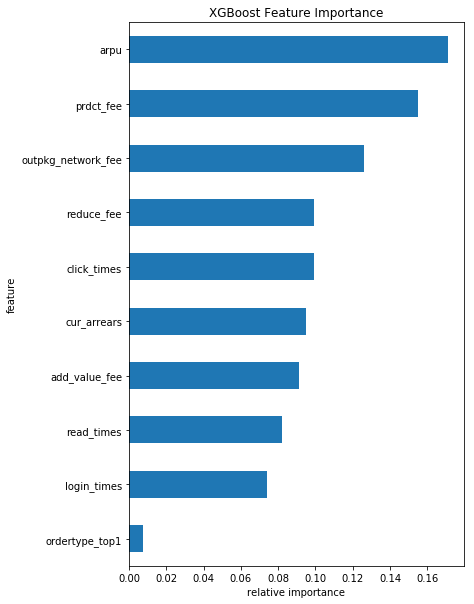

In [17]:
df=a
dtrain = xg.DMatrix(x_train, label=y_train)
dtest = xg.DMatrix(x_test, label=y_test)
    #######参数待调
param = {'learning_rate': 0.2, 'n_estimators': 1000, 'max_depth': 4,
             'min_child_weight': 3, 'gamma': 0, 'subsample': 1.0, 'colsample_bytree': 0.8,
             'scale_pos_weight': 1, 'eta': 0.05, 'silent': 1, 'objective': 'binary:logistic'}
num_round = 5000
param['eval_metric'] = "logloss"
plst = param.items()
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xg.train(plst, dtrain, num_round, evallist)
acc_xgb = round(clf.score(x_test, y_test) * 100, 2)
print(acc_log)
    #####xgb特征筛选
features = df.columns
create_feature_map(features)
importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()
df_importance.to_csv(r"C:\Users\123\Desktop\caixun\data\model\xgb_feat_importance.csv", index=False)
    ######画图
plt.figure()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

70.39


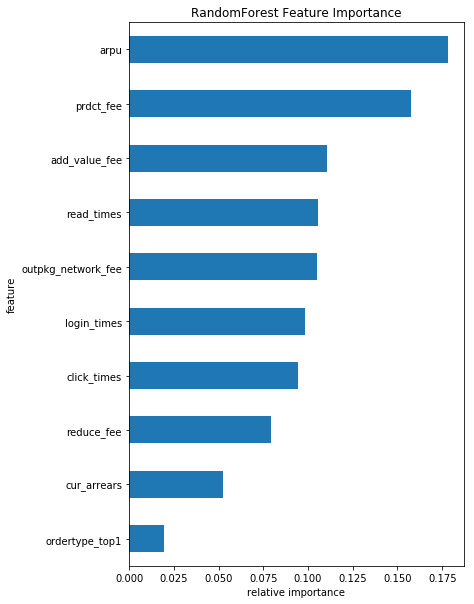

[('ordertype_top1', 0.019298246), ('cur_arrears', 0.052380953), ('reduce_fee', 0.079197995), ('click_times', 0.094235592), ('login_times', 0.098245613), ('outpkg_network_fee', 0.10476191), ('read_times', 0.10576441), ('add_value_fee', 0.11052632), ('prdct_fee', 0.15739349), ('arpu', 0.17819549)]


In [18]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())
random_forest.score(x_test, y_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest

print(acc_random_forest)
######输出各feature重要性
importance = map(fmap, feat, clf.feature_importances_)
importance = list(importance)
importance = sorted(importance, key=lambda d: d[1])
#####
df_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()
df_importance.to_csv(r"C:\Users\123\Desktop\caixun\data\model\RF_feat_importance.csv", index=False)
######画图
plt.figure()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('RandomForest Feature Importance')
plt.xlabel('relative importance')
plt.show()
print(importance)

In [19]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

62.780000000000001

In [20]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

c:\users\123\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.780000000000001

In [21]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

c:\users\123\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


55.060000000000002

In [22]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
              'Random Forest', 
             'Linear SVC', 
              'Decision Tree','Xgboost'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, 
              acc_linear_svc, acc_decision_tree,acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Xgboost,71.72
2,Random Forest,70.39
1,Logistic Regression,64.72
4,Decision Tree,62.78
0,Support Vector Machines,55.06
3,Linear SVC,50.78
